In [ ]:
# import packages
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib notebook
import networkx as nx 
import numpy as np
import random
import pickle
from networkx.algorithms import community
import pandas as pd
import community as community_louvain
import plotly.express as px
!pip install cdlib
from cdlib import algorithms
!pip install python-igraph
import igraph as ig




     |████████████████████████████████| 194kB 4.0MB/s 
     |████████████████████████████████| 22.3MB 6.4MB/s 
     |████████████████████████████████| 2.6MB 43.8MB/s 
     |████████████████████████████████| 276kB 45.2MB/s 
     |████████████████████████████████| 798kB 52.6MB/s 
     |████████████████████████████████| 51kB 8.8MB/s 
     |████████████████████████████████| 143kB 61.0MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.4MB 50.6MB/s 
     |████████████████████████████████| 40.6MB 76kB/s 
     |████████████████████████████████| 61kB 8.2MB/s 
     |████████████████████████████████| 3.2MB 40.7MB/s 
     |████████████████████████████████| 61kB 10.3MB/s 
     |████████████████████████████████| 194kB 59.3MB/s 
  Using cached https://files.pythonhosted.org/packages/8e/58/cdea07eb51fc2b906db0968a94700866fc46249bdc75cac23f9d13168929/importlib_metadata-1.7.0-py2.py

In [ ]:
# define funtions
def flip(beta):
    beta = beta * 100
    chance = (random.randint(1,100))
    if chance < beta:
        return True

def most_frequent(list):
    counter = 0
    num = list[0]
      
    for i in list:
        curr_frequency = list.count(i)
        if(curr_frequency> counter):
            counter = curr_frequency
    
    return counter

def n_communities(partition):
  different_communities = []
  for key in partition:
    if partition[key] not in different_communities:
      different_communities.append(partition[key])
  n_communities = len(different_communities)
  return n_communities

In [ ]:
# define function for combining 2 graphs
def combine_graphs_2(graphlist, t):
  G_set = list(map(tuple, np.array(graphlist[0].edges)))
  H_set = list(map(tuple, np.array(graphlist[1].edges) + len(graphlist[0].nodes)))
  random.shuffle(G_set)
  random.shuffle(H_set)
  C = nx.disjoint_union_all(graphlist)
  fractions = []
  counter = 0
  for i in range(len(graphlist[0].edges)):
    a = G_set.pop()
    b = H_set.pop()

      
    if C.has_edge(a[0], b[0]) or C.has_edge(a[1], b[1]):
      if C.has_edge(a[0], b[1]) or C.has_edge(a[1], b[0]):
        i-=1
        counter += 1
        continue
      else:
        C.add_edge(a[0], b[1])
        C.add_edge(a[1], b[0])
        #added_edges.append([a[0], b[1]])
        #added_edges.append([a[1], b[0]])

    elif C.has_edge(a[0], b[1]) or C.has_edge(a[1], b[0]):
      if C.has_edge(a[0], b[0]) or C.has_edge(a[1], b[1]):
        i-=1
        counter += 1
        continue
      else:
        C.add_edge(a[0], b[0])
        C.add_edge(a[1], b[1])
        #added_edges.append([a[0], b[0]])
        #added_edges.append([a[1], b[1]])

    elif flip(0.5):
      C.add_edge(a[0], b[1])
      C.add_edge(a[1], b[0])
      #added_edges.append([a[0], b[1]])
      #added_edges.append([a[1], b[0]])
    else:
      C.add_edge(a[0], b[0])
      C.add_edge(a[1], b[1])
      #added_edges.append([a[0], b[0]])
      #added_edges.append([a[1], b[1]])

    C.remove_edge(a[0], a[1])
    C.remove_edge(b[0], b[1])
    #removed_edges.append([a[0], a[1]])
    #removed_edges.append([b[0], b[1]])
    fraction = (len(G_set) + (counter / 2))/ len(graphlist[0].edges)
    fractions.append(fraction)
    if fraction <= t:
      break
  return C, fractions, i


In [ ]:
# define function for combining 3 graphs
def combine_graphs_3(graphlist, t):
  G_set = list(map(tuple, np.array(graphlist[0].edges)))
  H_set = list(map(tuple, np.array(graphlist[1].edges) + len(graphlist[0].nodes)))
  I_set = list(map(tuple, np.array(graphlist[2].edges) + len(graphlist[1].nodes) + len(graphlist[0].nodes)))
  random.shuffle(G_set)
  random.shuffle(H_set)
  random.shuffle(I_set)
  C = nx.disjoint_union_all(graphlist)
  fractions = []
  counter = 0
  for i in range(len(graphlist[0].edges)):
    a1, a2 = G_set.pop(), G_set.pop()
    b1, b2 = H_set.pop(), H_set.pop()
    c1, c2 = I_set.pop(), I_set.pop()

    edge_list1 = [a1, b1, c1]
    edge_list2 = [a2, b2, c2]
    if flip(0.5):
      pair1 = (a1, b1)
      pair2 = (a2, c2)
      pair3 = (b2, c1)
    else:
      pair1 = (a1, c1)
      pair2 = (a2, b1)
      pair3 = (b2, c2)  
    pairs = [pair1, pair2, pair3]    
    for a, b in pairs:
      if C.has_edge(a[0], b[0]) or C.has_edge(a[1], b[1]):
        if C.has_edge(a[0], b[1]) or C.has_edge(a[1], b[0]):
          i-=1
          counter += 1
          continue
        else:
          C.add_edge(a[0], b[1])
          C.add_edge(a[1], b[0])
          #added_edges.append([a[0], b[1]])
          #added_edges.append([a[1], b[0]])

      elif C.has_edge(a[0], b[1]) or C.has_edge(a[1], b[0]):
        if C.has_edge(a[0], b[0]) or C.has_edge(a[1], b[1]):
          i-=1
          counter += 1
          continue
        else:
          C.add_edge(a[0], b[0])
          C.add_edge(a[1], b[1])
          #added_edges.append([a[0], b[0]])
          #added_edges.append([a[1], b[1]])

      elif flip(0.5):
        C.add_edge(a[0], b[1])
        C.add_edge(a[1], b[0])
        #added_edges.append([a[0], b[1]])
        #added_edges.append([a[1], b[0]])
      else:
        C.add_edge(a[0], b[0])
        C.add_edge(a[1], b[1])
        #added_edges.append([a[0], b[0]])
        #added_edges.append([a[1], b[1]])

      C.remove_edge(a[0], a[1])
      C.remove_edge(b[0], b[1])
      #removed_edges.append([a[0], a[1]])
      #removed_edges.append([b[0], b[1]])
    fraction = (len(G_set) + (counter / 3))/ len(graphlist[0].edges)
    fractions.append(fraction)
    if fraction <= t:
      break
  return C, fractions, i

In [ ]:
# define function for combining 4 graphs
def combine_graphs_4(graphlist, t):
  G_set = list(map(tuple, np.array(graphlist[0].edges)))
  H_set = list(map(tuple, np.array(graphlist[1].edges) + len(graphlist[0].nodes)))
  I_set = list(map(tuple, np.array(graphlist[2].edges) + len(graphlist[1].nodes) + len(graphlist[0].nodes)))
  J_set = list(map(tuple, np.array(graphlist[3].edges) + len(graphlist[2].nodes) + len(graphlist[1].nodes) + len(graphlist[0].nodes)))
  random.shuffle(G_set)
  random.shuffle(H_set)
  random.shuffle(I_set)
  random.shuffle(J_set)
  C = nx.disjoint_union_all(graphlist)
  #added_edges = []
  #removed_edges = []
  fractions = []
  counter = 0
  for i in range(len(graphlist[0].edges)):
    a = G_set.pop()
    b = H_set.pop()
    c = I_set.pop()
    d = J_set.pop()

    edge_list = [a,b,c,d]
    random.shuffle(edge_list)
    for j in range(0, 4, 2):
      a = edge_list[j]
      b = edge_list[j + 1]
      
      if C.has_edge(a[0], b[0]) or C.has_edge(a[1], b[1]):
        if C.has_edge(a[0], b[1]) or C.has_edge(a[1], b[0]):
          i-=1
          counter += 1
          continue
        else:
          C.add_edge(a[0], b[1])
          C.add_edge(a[1], b[0])
          #added_edges.append([a[0], b[1]])
          #added_edges.append([a[1], b[0]])

      elif C.has_edge(a[0], b[1]) or C.has_edge(a[1], b[0]):
        if C.has_edge(a[0], b[0]) or C.has_edge(a[1], b[1]):
          i-=1
          counter += 1
          continue
        else:
          C.add_edge(a[0], b[0])
          C.add_edge(a[1], b[1])
          #added_edges.append([a[0], b[0]])
          #added_edges.append([a[1], b[1]])

      elif flip(0.5):
        C.add_edge(a[0], b[1])
        C.add_edge(a[1], b[0])
        #added_edges.append([a[0], b[1]])
        #added_edges.append([a[1], b[0]])
      else:
        C.add_edge(a[0], b[0])
        C.add_edge(a[1], b[1])
        #added_edges.append([a[0], b[0]])
        #added_edges.append([a[1], b[1]])

      C.remove_edge(a[0], a[1])
      C.remove_edge(b[0], b[1])
      #removed_edges.append([a[0], a[1]])
      #removed_edges.append([b[0], b[1]])
    fraction = (len(G_set) + (counter / 4))/ len(graphlist[0].edges)
    fractions.append(fraction)
    if fraction <= t:
      break
  return C, fractions, i


In [ ]:
# define function for generating data
def datagenerator(alg, nodes, frac, n_modules, edges=None, p=None):

  if alg == 'BA':
    G = nx.barabasi_albert_graph(nodes, edges)
    H = nx.barabasi_albert_graph(nodes, edges)
    I = nx.barabasi_albert_graph(nodes, edges)
    J = nx.barabasi_albert_graph(nodes, edges)
  elif alg == 'ER':
    G = nx.erdos_renyi_graph(nodes, p)
    H = nx.erdos_renyi_graph(nodes, p)
    I = nx.erdos_renyi_graph(nodes, p)
    J = nx.erdos_renyi_graph(nodes, p)
  else:
    raise Exception('Please enter one of the following algorithms: BA or ER')
  if n_modules == 2:
    C, fractions, i = combine_graphs_2([G,H], frac)
  elif n_modules == 3:
    C, fractions, i = combine_graphs_3([G,H,I], frac)
  else:
    C, fractions, i = combine_graphs_4([G,H,I,J], frac)
  return C



In [ ]:
# define function for community detection
def community_detection(C, alg, k=None):
  if alg == 'louvain':
    com = algorithms.louvain(C)
  elif alg == 'walktrap':
    com = algorithms.walktrap(C)
  elif alg == 'leiden':
    com = algorithms.leiden(C)
  elif alg == 'label_propagation':
    com = algorithms.label_propagation(C)
  elif alg == 'leading_eigenvector':
    com = algorithms.eigenvector(C)
  else:
    raise Exception('Please enter one of the following algorithms: louvain, walktrap, kmeans, label_propagation or leading_eigenvector')
  partition = {}
  for value in range(len(com.communities)):
    for key in com.communities[value]:
      partition[key] = value
  return partition

In [1]:
# define function to calculate the correctness of networks with 4 modules
def get_correctness_4(partition, nodes):
  correctness = []
  first_group = []
  second_group = []
  third_group = []
  fourth_group = []

  for key in partition:
    if key < nodes:
      first_group.append(partition[key])
    elif key < (nodes*2):
      second_group.append(partition[key])
    elif key < (nodes*3):
      third_group.append(partition[key])
    else:
      fourth_group.append(partition[key])

  group1 = most_frequent(first_group) / (nodes/100) 
  group2 = most_frequent(second_group) / (nodes/100) 
  group3 = most_frequent(third_group) / (nodes/100) 
  group4 = most_frequent(fourth_group) / (nodes/100) 
  n_coms = n_communities(partition)
  if n_coms < 4:
    group1 = group1 * (n_coms/ 4)
    group2 = group2 * (n_coms/ 4)
    group3 = group3 * (n_coms/ 4)
    group4 = group4 * (n_coms/ 4)

  correctness.append(group1)
  correctness.append(group2)
  correctness.append(group3)
  correctness.append(group4)
  return correctness


In [ ]:
# define function to calculate the correctness of networks with 3 modules
def get_correctness_3(partition, nodes):
  correctness = []
  first_group = []
  second_group = []
  third_group = []


  for key in partition:
    if key < nodes:
      first_group.append(partition[key])
    elif key < (nodes*2):
      second_group.append(partition[key])
    elif key < (nodes*3):
      third_group.append(partition[key])
    

  group1 = most_frequent(first_group) / (nodes/100) 
  group2 = most_frequent(second_group) / (nodes/100) 
  group3 = most_frequent(third_group) / (nodes/100) 
  n_coms = n_communities(partition)
  if n_coms < 3:
    group1 = group1 * (n_coms/ 3)
    group2 = group2 * (n_coms/ 3)
    group3 = group3 * (n_coms/ 3)

  correctness.append(group1)
  correctness.append(group2)
  correctness.append(group3)
  return correctness


In [ ]:
# define function to calculate the correctness of networks with 2 modules
def get_correctness_2(partition, nodes):
  correctness = []
  first_group = []
  second_group = []


  for key in partition:
    if key < nodes:
      first_group.append(partition[key])
    else:
      second_group.append(partition[key])

  group1 = most_frequent(first_group) / (nodes/100) 
  group2 = most_frequent(second_group) / (nodes/100) 
 
  n_coms = n_communities(partition)
  if n_coms < 2:
    group1 = group1 * (n_coms/ 2)
    group2 = group2 * (n_coms/ 2)


  correctness.append(group1)
  correctness.append(group2)

  return correctness


In [ ]:
# generate data and execute community detection algorithms
avg_cor_walktrap = []
f = []
for frac in range(2500, 10001, 10):
  fraction = frac / 10000
  print(fraction)
  C = datagenerator('BA', 100, fraction, 2, edges = int(100*0.22))
  #cor_louvain = get_correctness_4(community_detection(C, 'louvain'), 500)
  #cor_walktrap = get_correctness_4(community_detection(C, 'walktrap'), 100)
  #cor_kmeans = get_correctness_4(community_detection(C, 'kmeans', k = 4), 250)
  cor_label_propagation = get_correctness_2(community_detection(C, 'label_propagation'), 100)
  #cor_leading_eigenvector = get_correctness_4(community_detection(C, 'leading_eigenvector'), 250)
  avg = np.sum(cor_label_propagation)/2
  avg_cor_walktrap.append(avg)
  f.append(fraction)
  
  if avg >= 90.0:
    break
print(avg_cor_walktrap)
print(f)


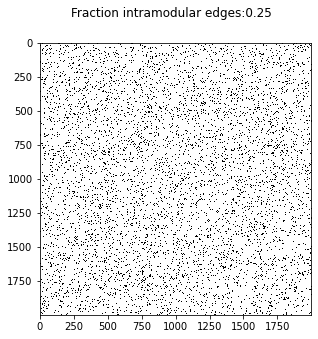

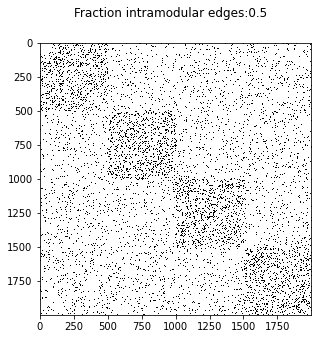

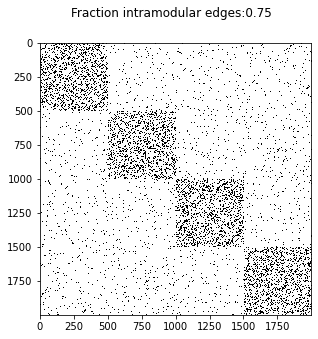

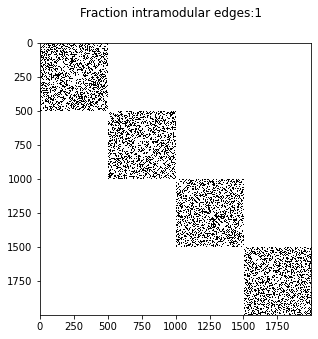

In [ ]:
# draw adjacency matrix
from matplotlib import pyplot, patches

def draw_adjacency_matrix(G, l, node_order=None):
    """
    - G is a netorkx graph
    - node_order (optional) is a list of nodes, where each node in G
          appears exactly once
    - partitions is a list of node lists, where each node in G appears
          in exactly one node list
    - colors is a list of strings indicating what color each
          partition should be
    If partitions is specified, the same number of colors needs to be
    specified.
    """
    adjacency_matrix = nx.to_numpy_matrix(G, dtype=np.bool, nodelist=node_order)

    #Plot adjacency matrix in toned-down black and white
    fig = pyplot.figure(figsize=(5, 5)) # in inches
    fig.suptitle('Fraction intramodular edges:' + str(l))
    figure = pyplot.imshow(adjacency_matrix,
                  cmap="Greys",
                  interpolation="none")
    return figure
    
figure1 = draw_adjacency_matrix(C1, 0.25)
figure2 = draw_adjacency_matrix(C2, 0.5)
figure3 = draw_adjacency_matrix(C3, 0.75)
figure4 = draw_adjacency_matrix(C4, 1)


In [ ]:
# calculate average execution time
time_louvain = []
time_leiden = []
time_walktrap = []
time_eigen = []
time_label = []
import time
for i in range(100):
  start = time.time()
  community_detection(C1, 'louvain')
  end = time.time()
  print('Louvain')
  time_louvain.append(end-start)
  start = time.time()
  community_detection(C2, 'leiden')
  end = time.time()
  print('Leiden')
  time_leiden.append(end-start)
  start = time.time()
  community_detection(D, 'walktrap')
  end = time.time()
  print('Walktrap')
  time_walktrap.append(end-start)
  start = time.time()
  community_detection(C3, 'leading_eigenvector')
  end = time.time()
  print('Leading_eigenvector')
  time_eigen.append(end-start)
  start = time.time()
  community_detection(C4, 'label_propagation')
  end = time.time()
  print('Label_propagation')
  time_label.append(end-start)
print(np.sum(time_louvain) / 100)
print(np.sum(time_leiden) / 100)
print(np.sum(time_walktrap) / 100)
print(np.sum(time_eigen) / 100)
print(np.sum(time_label) / 100)

In [ ]:
# define function for calculating metrics
def get_metrics(C):

  clustering = nx.average_clustering(C)
  
  avg_path = nx.average_shortest_path_length(C)
  som = 0
  eccentricity = nx.eccentricity(C)
  for key in eccentricity:
    som += eccentricity[key] 
  avg_ecc = som / len(C.nodes)
  transitivity = nx.transitivity(C)

  assortivity = nx.degree_pearson_correlation_coefficient(C)

  return [avg_path, assortivity, transitivity, avg_ecc, clustering]
